Final Project

VIX Rakamin Academy with id/x partners

M. Hazim M.

# Data science workflow

<img src='https://dagshub.com/blog/content/images/2021/12/Data-Science-Project-Lifecycle.jpeg'>

=> Data Science Project Lifecycle. (Drawn by Nir Barazida)

To better understand the challenges in the experiment tracking workflow, let's first define the steps involved in a typical project:

1. Understand the business problem at hand.
2. Gather the raw data.
3. Explore, transform, clean, and prepare the data.
4. Create and select models based on the data.
5. Train, test, tune and deploy the model.
6. Monitor the model's performance.

Refrences: https://dagshub.com/blog/data-science-workflows-to-track-experiments/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# set the max columns to none
pd.set_option('display.max_columns', None)

In [ ]:
# read the csv file
link1 = '/content/drive/MyDrive/0.Data_analyst_important_thing/1.VIX_rakamin_DS_IDX/Tugas2_VIX_Rakamin_DS_IDX/file/df_clean.csv'
df = pd.read_csv(link1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,27050,27050,27050.0,36 months,10.99,885.46,B2,10+ years,OWN,55000.0,Verified,Current,n,debt_consolidation,MI,22.87,0.0,0.0,14.0,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,1,0.0,0.0,114834.0,59900.0
1,9750,9750,9750.0,36 months,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,Current,n,debt_consolidation,CA,25.12,0.0,0.0,12.0,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,1,0.0,0.0,14123.0,15100.0
2,12000,12000,12000.0,36 months,6.62,368.45,A2,10+ years,MORTGAGE,105000.0,Not Verified,Current,n,debt_consolidation,CT,14.05,0.0,1.0,12.0,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1,0.0,0.0,267646.0,61100.0
3,12000,12000,12000.0,36 months,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,Fully Paid,n,debt_consolidation,NM,16.94,0.0,0.0,7.0,2.0,5572,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,1,0.0,15386.0,13605.0,8100.0
4,15000,15000,15000.0,36 months,8.90,476.30,A5,2 years,MORTGAGE,63000.0,Not Verified,Current,n,debt_consolidation,FL,16.51,0.0,0.0,8.0,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1,0.0,1514.0,272492.0,15400.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376850 entries, 0 to 376849
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   376850 non-null  int64  
 1   funded_amnt                 376850 non-null  int64  
 2   funded_amnt_inv             376850 non-null  float64
 3   term                        376850 non-null  object 
 4   int_rate                    376850 non-null  float64
 5   installment                 376850 non-null  float64
 6   sub_grade                   376850 non-null  object 
 7   emp_length                  376850 non-null  object 
 8   home_ownership              376850 non-null  object 
 9   annual_inc                  376850 non-null  float64
 10  verification_status         376850 non-null  object 
 11  loan_status                 376850 non-null  object 
 12  pymnt_plan                  376850 non-null  object 
 13  purpose       

In [ ]:
df['installment'].head()

0    885.46
1    333.14
2    368.45
3    407.40
4    476.30
Name: installment, dtype: float64

In [ ]:
# Numeric Column
numcols = df.select_dtypes([np.number]).columns
print(numcols)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [ ]:
len(numcols)
numcols[0:6]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc'],
      dtype='object')

In [ ]:
# try
col1 = ['installment', 'sub_grade', 'emp_length']
df[col1].columns[1]

'sub_grade'

# 3.1 Data Cleaning (Part 2)-Handle Outlier

## Detect the outliers
reference: https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4

In [ ]:
# we will create  boxplot for numerical column
# but we need to divide the column, so the graph still look clear
numcols1 = numcols[0:6]
numcols2 = numcols[6:12]
numcols3 = numcols[12:18]
numcols4 = numcols[18:24]
numcols5 = numcols[24:31]
print(numcols5)
print(len(numcols4))

Index(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')
6


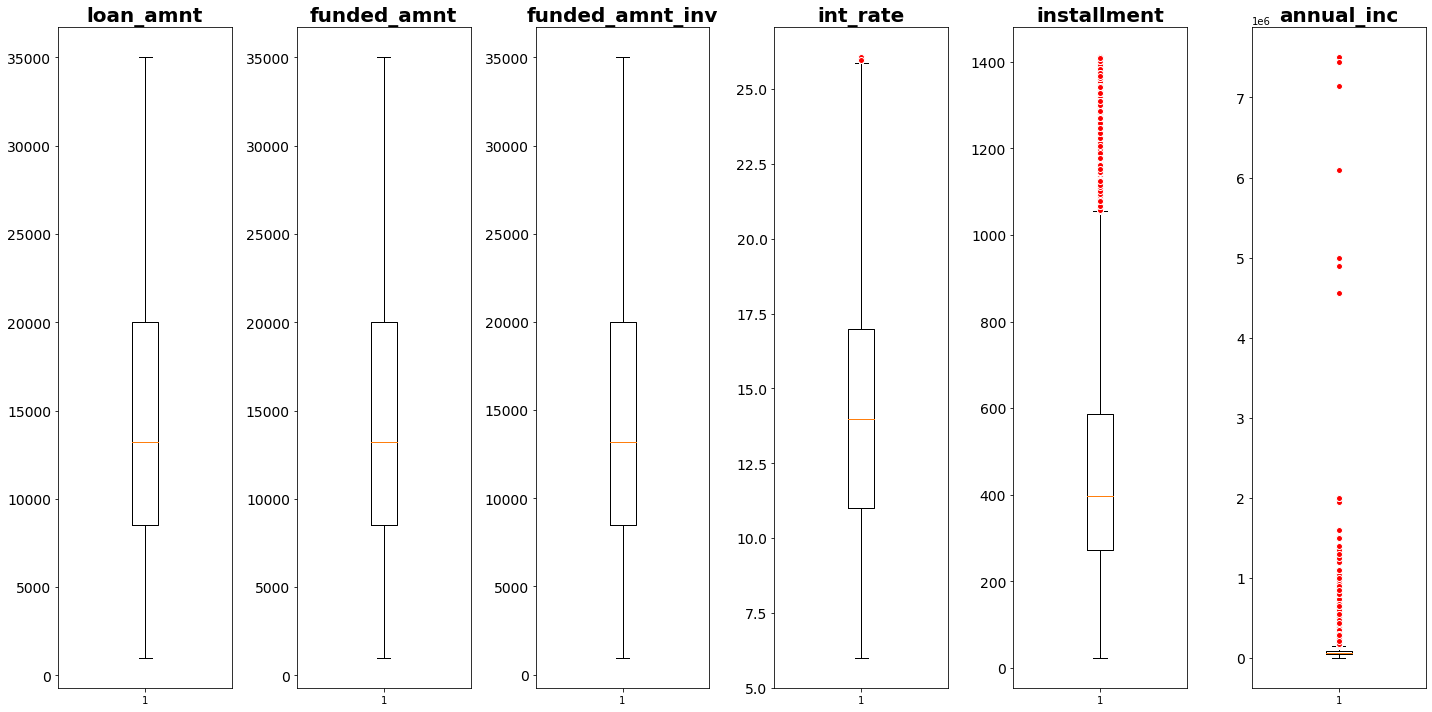

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numcols1), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df[numcols1].iloc[:,i], flierprops=red_circle)
      ax.set_title(df[numcols1].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()
except:
  print("Error")

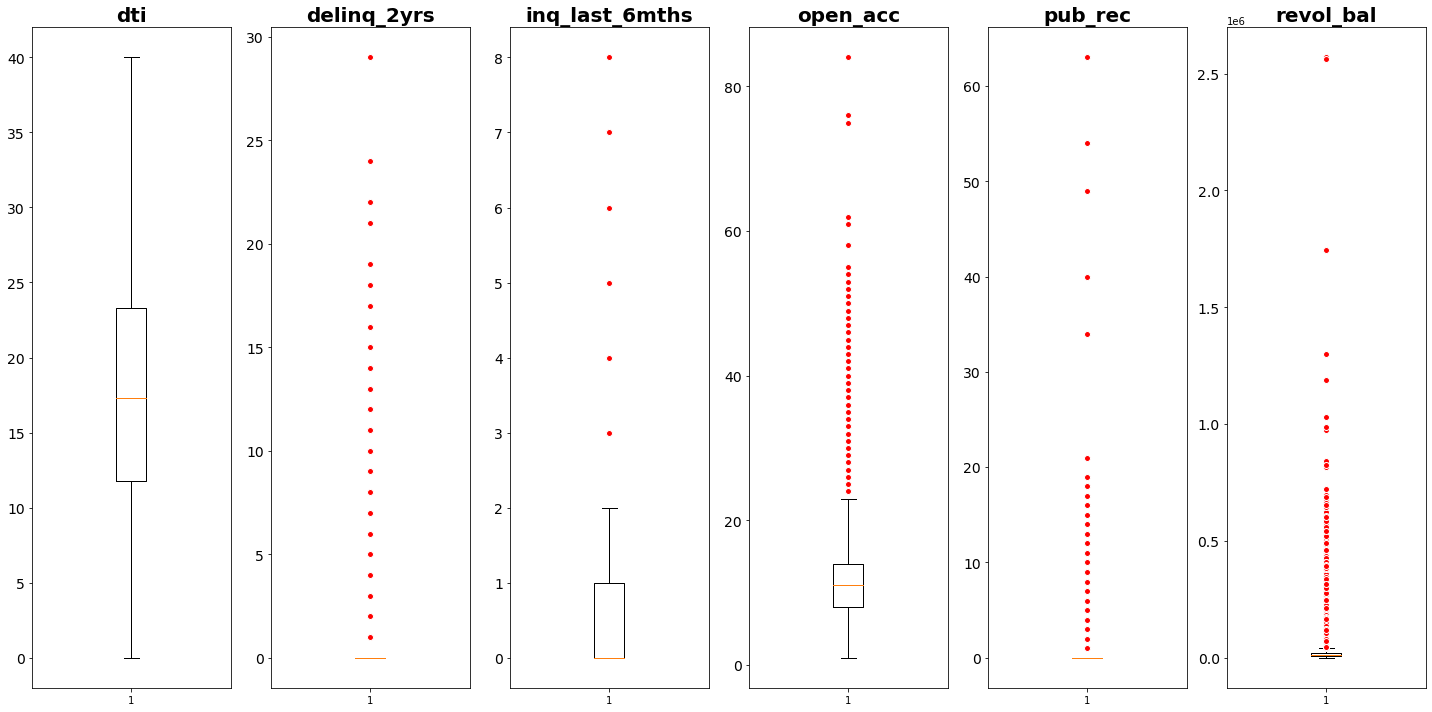

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numcols2), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df[numcols2].iloc[:,i], flierprops=red_circle)
      ax.set_title(df[numcols2].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()
except:
  print("Error")

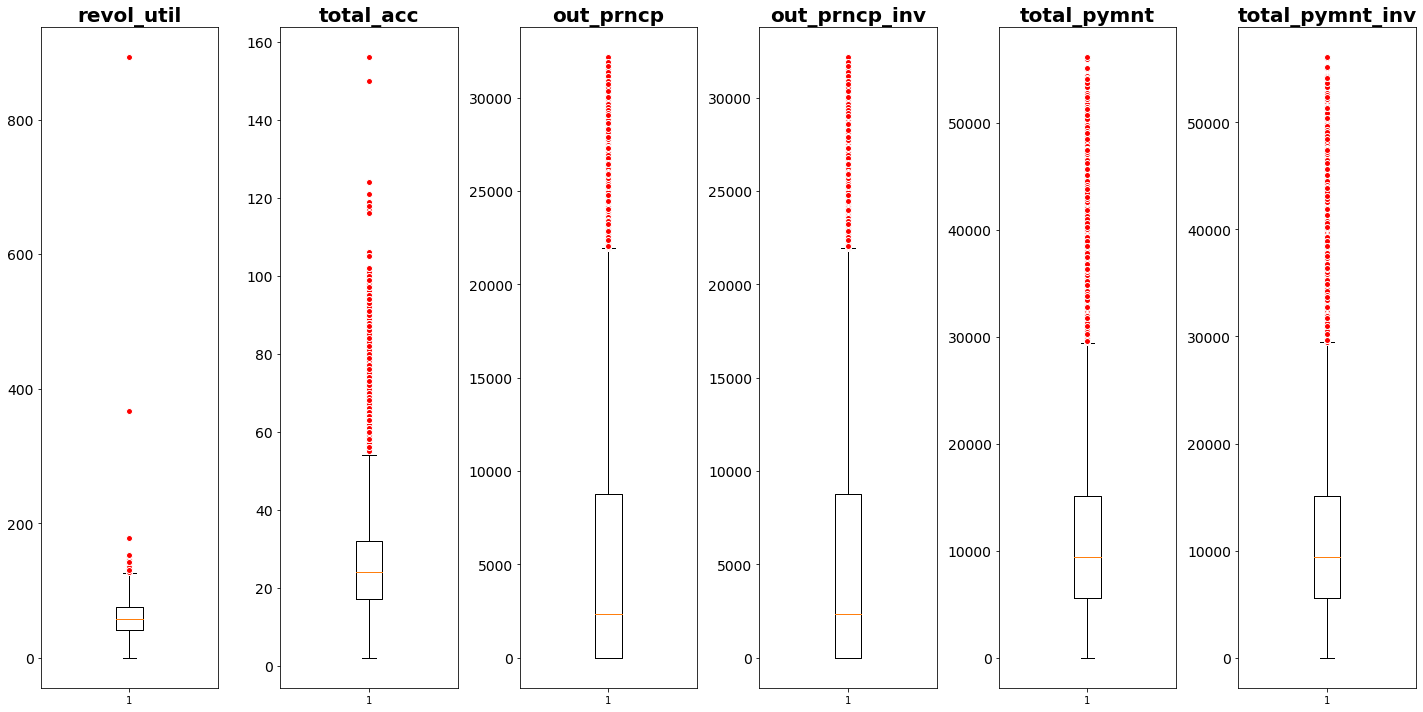

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numcols3), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df[numcols3].iloc[:,i], flierprops=red_circle)
      ax.set_title(df[numcols3].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()
except:
  print("Error")

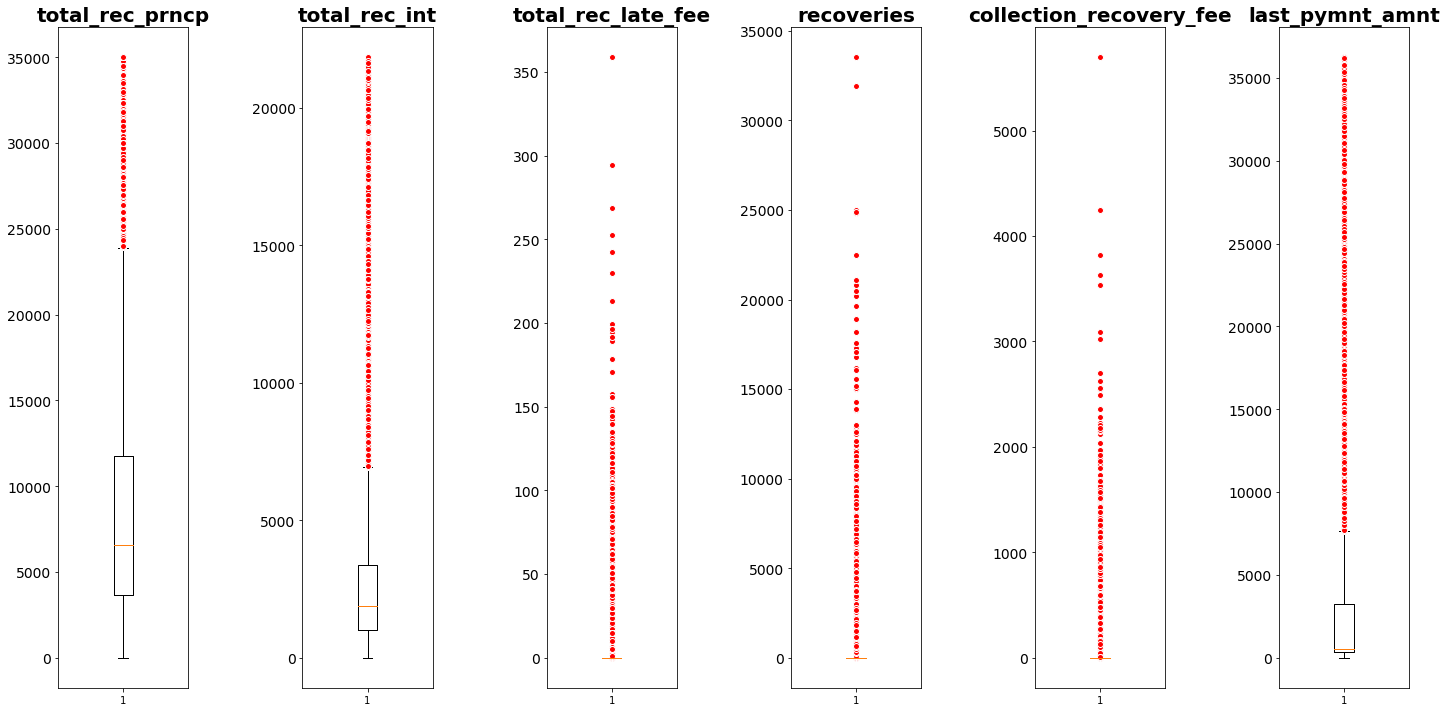

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numcols4), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df[numcols4].iloc[:,i], flierprops=red_circle)
      ax.set_title(df[numcols4].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()
except:
  print("Error")

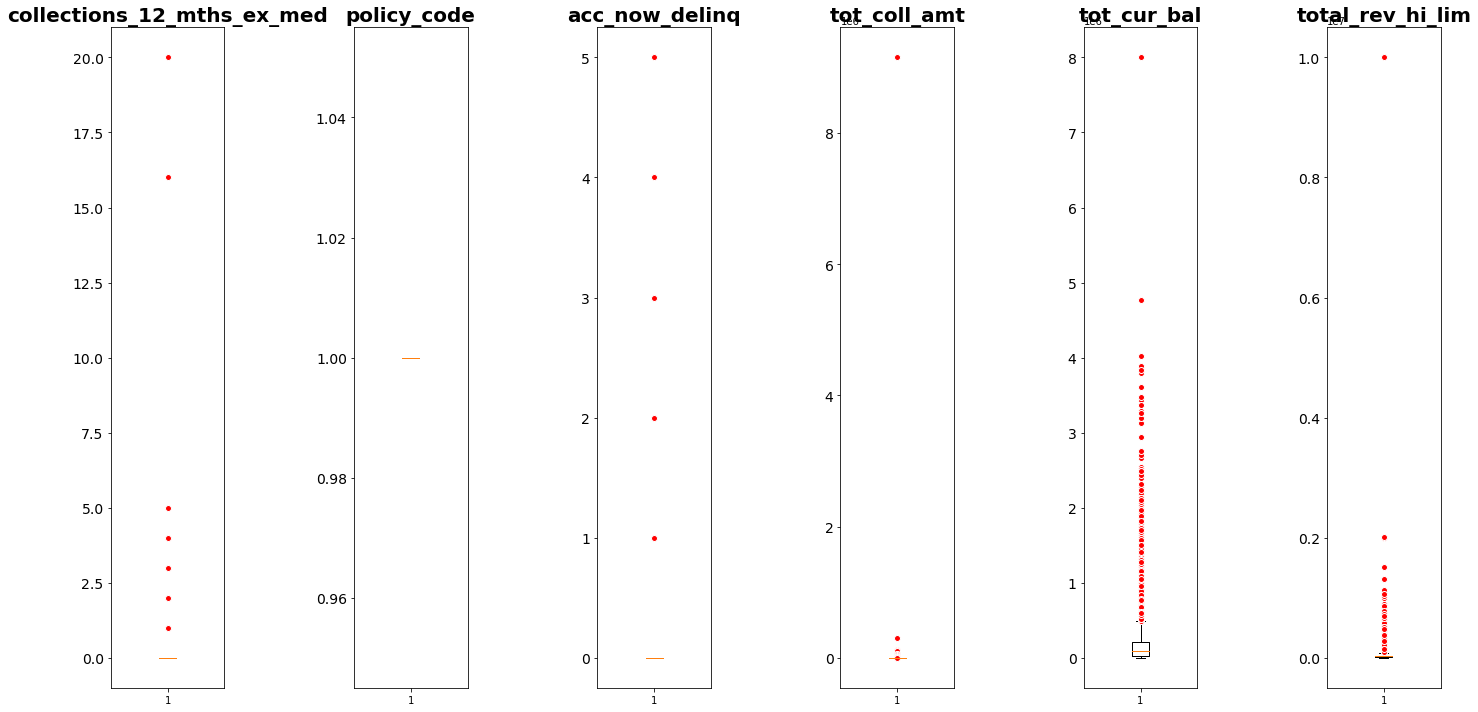

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numcols5), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df[numcols5].iloc[:,i], flierprops=red_circle)
      ax.set_title(df[numcols5].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()
except:
  print("Error")

## Notes After Detecting Outliers

- Remove the policy_code column, it only has one value
- Some of the columns have outliers, but if we think again, it doesn't look like the wrong data. 
  - Installment is The monthly payment owed by the borrower if the loan originates, some people could have higher installment
  - annual_inc also looks normal, some people could have a higher income than others
  - delinq_2_years is The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. Some people have it, but most people don't have it. Since we want to classify which one is a good and bad loaner, keeping the outlier in this column wouldn't be a bad idea
  - and that includes other column that has outliers

references:
- https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/
- https://stats.stackexchange.com/questions/200534/is-it-ok-to-remove-outliers-from-data

In [ ]:
df['policy_code'].unique()

array([1])

In [ ]:
df.drop('policy_code', inplace=True, axis=1)

## Handling Outlier
<!-- Below are some of the methods of treating the outliers:
- Trimming/removing the outlier
- Quantile based flooring and capping
- Mean/Median imputation
- Or you can leave it

=> For filtering the outlier, since most of the column that have outlier are skewed, we can filter it based on IQR

References: 
- https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
- https://stackoverflow.com/questions/55471750/how-do-i-remove-outliers-using-multiple-columns-pandas -->

In [ ]:
# def remove_outlier_IQR(df):
#   # Finding IQR
#   percentile25 = df.quantile(0.25)
#   percentile75 = df.quantile(0.75)
#   iqr = percentile75 - percentile25
#   # Finding upper and lower limit
#   upper_limit = percentile75 + 1.5 * iqr
#   lower_limit = percentile25 - 1.5 * iqr
#   # result
#   df_final=df[~((df<(lower_limit)) | (df>(upper_limit)))]  
#   return df_final

In [ ]:
# df_outlier_removed = remove_outlier_IQR(df_no_outlier)
# df_outlier_removed = pd.DataFrame(df_outlier_removed)

# 4.0 Data Preprocessing

Data preprocessing is highly recommended before you begin with the modeling phase. The steps involved are:

### 1. Get Rid of Duplicate Data 

### 2. Handling Highly Correlated Features:

<!-- Clustering and correlation plots can help find out if two features are strongly correlated or offer the same information.

As a general rule, if the correlation between the two features is higher than 99%, you can safely remove one of them.

The threshold (for correlation) percentage can be decided on the basis of the problem at hand. -->

### 3. Handling Low-Variance Features:

<!-- You can remove a feature if its variance is too low.

Such a feature remains constant in a dataset and cannot explain or influence the variation in the target variable. -->

### 4. Handling Imbalanced Data:

In the case of imbalanced data sets, you can

Oversample the class with lesser data points (you can use SMOTE or create duplicate data points)
Undersample the class with more data points (you can remove a few similar data points)

=> The sampling approach depends on the data characteristics:
1. Balanced Data -> Use simple random sampling
2. Imbalanced Data -> Use Stratified random sampling (either the data under sampling [lower probability for majority class / bigger to smaller] or over sampling [Higher probability for minority class / you reduce the data / smaller to bigger] 

### 5. Handling Missing Values:

<!-- There are different ways to handle missing values in a data set after you are done importing the libraries and the data set.

1. High Percentage of Missing Values: You can drop a feature having more than 40–50% missing values.
2. Low Percentage of Missing Values: If the missing values for a feature are very low, you can drop the rows that contain missing values.
3. Imputation: The data is rarely complete; data can be missing due to numerous reasons: not captured, captured but not available, etc. In this scenario, you can continue with analysis after estimating the missing value. The process is called imputation. You can impute the missing values with the mean or median for a numerical feature and mode for a categorical feature. -->


### 6. Encoding Categorical Features:

At times, some data is in qualitative (text) form. In this case, you will find categories in text form in the data.

Such categorical features need to be converted into numerical data as most data models are based on mathematical equations and calculations and take numerical data as input.

You can use one-hot (variable binary representation) or label encoding if there aren’t too many categorical features. Otherwise, you may need to use supervised ration.

=> Categorical Handling Approach:
1. Convert categorical to numerical using label encoding
2. convert numerical variable to dummy variable with one hot encoding (don't forget to delete one column of dummy variable); number of dummy var -> n-1 (to prevent dummy variable trap)

reference: https://www.naukri.com/learning/articles/one-hot-encoding-vs-label-encoding/#When-to


### 7. Feature Scaling:

Scaling is a method deployed to standardize the range of features or independent variables.

Various features in a data set will vary in their scale.

Since some features may dominate the rest, it is recommended to have all of them on the same scale.

you can use one of two approaches feature scaling:
1. standardization 
2. Normalization

### 8. Dimensionality Reduction:

<!-- This preprocessing step is important when you’re dealing with big data sets having hundreds or thousands of features.

You can use the Principal Component Analysis (PCA) technique here.

In this technique, the linear combination of a set of original features is transformed into a new set of features by reducing the size of feature space while retaining maximum information possible. -->


### 9. Train and Test Sets:

Check if the distribution of train and test sets is the same. Otherwise, the analysis will make no sense.

As a general rule, 20% of the data set is allocated to the test set and the remaining 80% is allocated to the training set. You will train a machine learning set on the training set and test it on the training set to check how well it can predict.

Shuffle the data set so that your model learns about the various data points in a single iteration.

# 4.0 Feature engineering 
Refrences: : 
- https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/
- https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10#:~:text=Feature%20engineering%20is%20the%20process,design%20and%20train%20better%20features

consists of various process:
### 1. Feature Creation: 
<!-- Creating features involves creating new variables which
will be most helpful for our model. This can be adding or removing some  features. As we saw above, the cost per sq. ft column was a feature creation. -->

### 2. Transformations: 
<!-- Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model. -->

### 3. Feature Extraction: 
<!-- Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process. -->

### 4. Exploratory Data Analysis : 
<!-- Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t
been analyzed before. -->

### 5. Benchmark : 
<!-- A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own. It’s a good idea to run test datasets to see if your new machine learning model outperforms a recognised benchmark. These benchmarks are often used as measures for comparing the performance between different machine learning models like neural networks and support vector machines, linear and non-linear classifiers, or different approaches like bagging and boosting. To learn more about feature engineering steps and process, check the links provided at the end of this article. Now, let’s have a look at why we need feature engineering in machine learning. -->

## Curse of Dimensionality — A “Curse” to Machine Learning
Refrence:
- https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb

Curse of Dimensionality describes the explosive nature of increasing data dimensions and its resulting exponential increase in computational efforts required for its processing and/or analysis. This term was first introduced by Richard E. Bellman, to explain the increase in volume of Euclidean space associated with adding extra dimensions, in area of dynamic programming.

For example, in the field of breast cancer research, age, number of cancerous nodes can be used as features to define the prognosis of the breast cancer patient. These features constitute the dimensions of a feature vector. But other factors like past surgeries, patient history, type of tumor and other such features help a doctor to better determine the prognosis. In this case by adding features, we are theoretically increasing the dimensions of our data.

### 5.1 Change label in Status (For classification)

- 0: good loaner / low risk
  - 'Fully Paid', 'Current'
- 1: Bad loaner / High risk
  - 'Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'

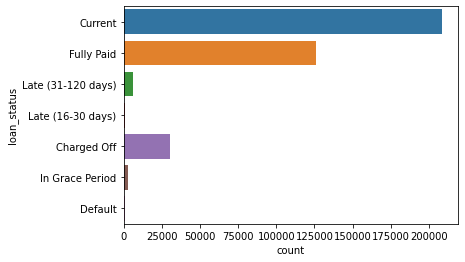

In [ ]:
# See the loan_status Distribution
sns.countplot(y='loan_status', data=df)
plt.show()

In [ ]:
df['loan_status'].value_counts()

Current               208951
Fully Paid            126115
Charged Off            30540
Late (31-120 days)      6376
In Grace Period         2978
Late (16-30 days)       1123
Default                  767
Name: loan_status, dtype: int64

In [ ]:
# Change the value
df['loan_status'].replace({'Fully Paid': 0, 'Current' : 0}, inplace=True)
df['loan_status'].replace({'Charged Off': 1, 
                           'Late (31-120 days)' : 1, 
                           'In Grace Period' : 1,
                           'Late (16-30 days)' : 1,
                           'Default' : 1}, inplace=True)
df['loan_status'] = df['loan_status'].astype('int')

In [ ]:
# Look at the distribution of Status now
df['loan_status'].value_counts(normalize=True) 

0    0.889123
1    0.110877
Name: loan_status, dtype: float64

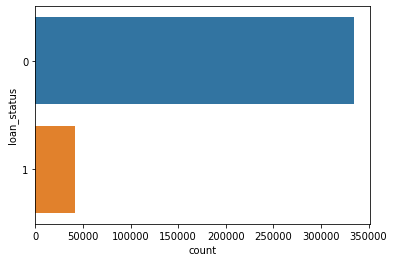

In [ ]:
sns.countplot(y='loan_status', data=df)
plt.show()

=> The loan status column is not balanced, the '0' so much bigger than the '1'. We need to do oversampling

### 5.2 Exploratory Data Analysis (EDA)

Before diving deeper into the concept of EDA, ponder upon the following questions:

- How do you make sure that you are ready to apply machine learning algorithms to a data set?
- How do you pick the best algorithm for a data set?
- How can you define and refine various feature variables that can potentially be used for data modeling?

It is the process of summarizing, visualizing and getting deeply acquainted with the important traits of a data set. When you carry out EDA, domain knowledge (e.g. about the business or social impact category) can help a great deal in understanding the data and extracting insights from it.



**To achieve this level of certainty, here’s what you can do with EDA:**

- Understand how the raw data was collected
- Get familiar with different characteristics of the data
- Learn about the individual features and their mutual relationships (or lack of)
- Check and validate the data for anomalies, outliers, missing values, human errors, etc.
- Extract insights that weren’t so evident to business stakeholders but can provide useful information about the business
- Discover hidden patterns in the data that allow for better comprehension of the business problem
- Validate if the data has been generated in an expected manner

### 5.2.1 Data Visualization (to see the distribution and relationship between variables)


### - univariate 
(The purpose of the univariate analysis is to understand the distribution of values for a single variable.)
  - We can perform univariate analysis with 3 options :
    1. Summary Statistics
    2. Frequency Distributions Table (distplot)
    <!-- - The distribution plot shows us how our variable is distributed. On the other hand, kernel density estimation allows us to estimate the probability density function from the numerical variables. So that we can easily see the probability of getting each value visually. (skewed); from the skew we can know the mean and median visually -->
    3. Charts (Boxplot, Histogram, Barplot, Pie Chart)

### - Bivariate 
(Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.)
  - For bivariate analysis, we could use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).


### - Multivariate
  - Correlation is used to test relationships between quantitative variables or categorical variables. It’s a measure of how things are related. The table above shows us how we can interpret correlation coefficients.
<img src='https://www.researchgate.net/profile/Gizem-Aykac-Guelpinar/publication/310600843/figure/tbl2/AS:650806281920531@1532175717897/Interpreting-the-size-of-a-Correlation-Coefficient.png'>
  - There are different methods to calculate correlation coefficient: Pearson, Kendall, Spearman. We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. .corr() method is used Pearson correlation by default.





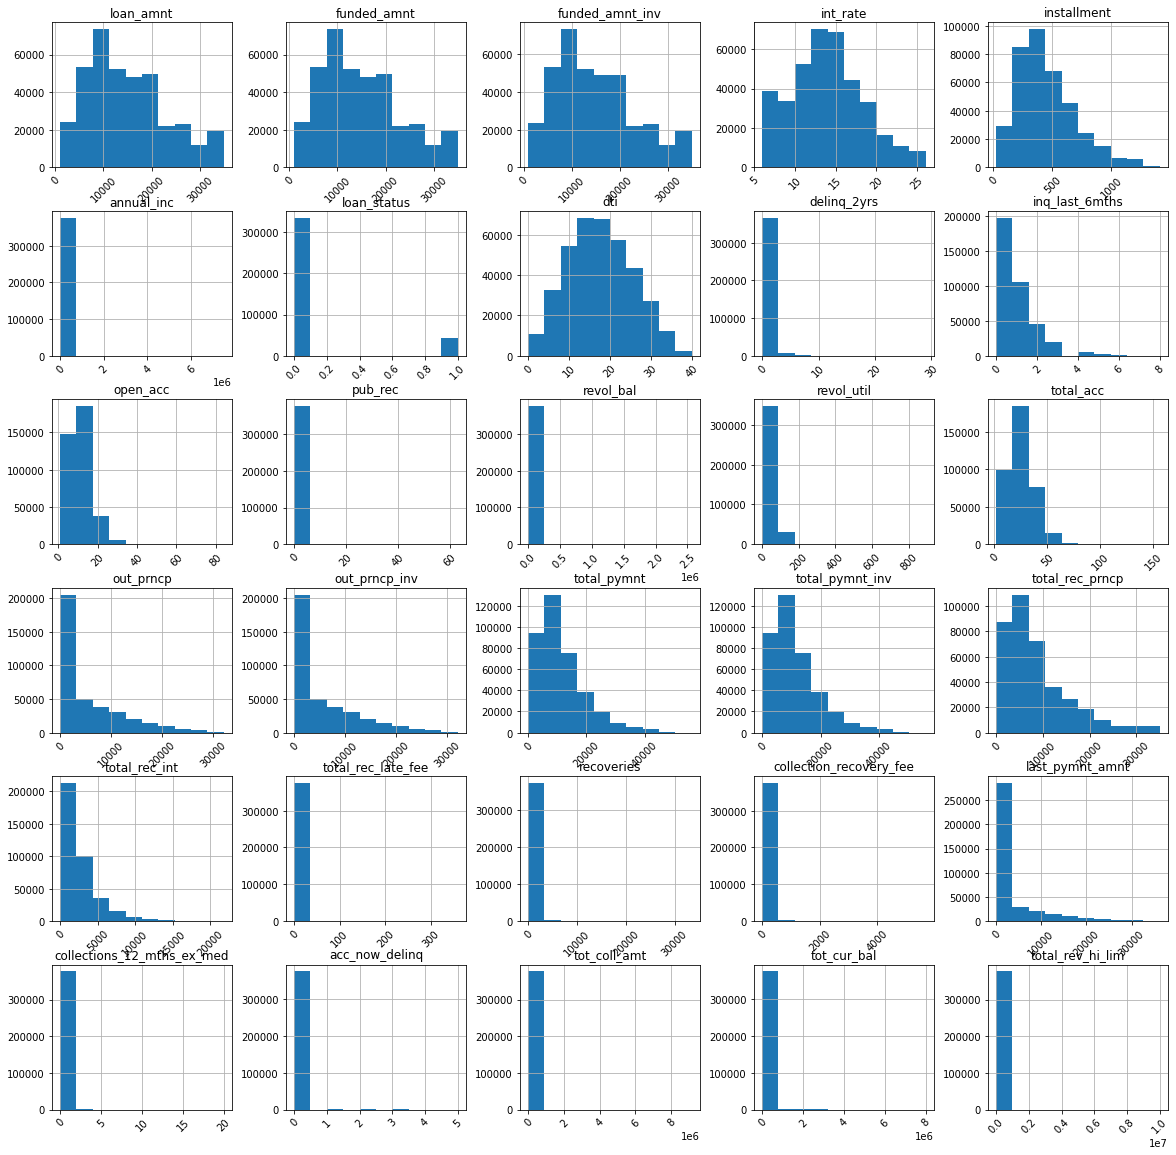

In [ ]:
# Plot Numeric Feature
df.hist(figsize=(20,20), xrot=45)
plt.show()

In [ ]:
# Summary Statistic Numeric
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,3.768500e+05,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,3.768500e+05,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,376850.000000,3.768500e+05,3.768500e+05,3.768500e+05
mean,14888.671554,14888.631219,14882.086348,14.041789,449.098028,7.525731e+04,0.110877,17.672758,0.310543,0.776606,11.510856,0.174059,1.671911e+04,57.003821,25.595871,5187.218138,5185.477092,11448.943279,11443.358713,8730.121774,2637.091847,0.546018,81.183645,8.478019,3225.884434,0.010628,0.004731,1.890128e+02,1.410849e+05,3.056727e+04
std,8314.169706,8314.123537,8310.854098,4.384746,244.054319,5.526141e+04,0.313980,7.849850,0.837268,1.037081,5.038284,0.537941,2.113791e+04,22.940943,11.588568,6650.634596,6648.741119,8084.762180,8080.425621,6999.812867,2429.562431,4.867119,524.460915,73.944507,5738.756512,0.117540,0.074695,1.499049e+04,1.532987e+05,3.768397e+04
min,1000.000000,1000.000000,950.000000,6.000000,23.260000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02
25%,8500.000000,8500.000000,8500.000000,10.990000,272.980000,4.700000e+04,0.000000,11.770000,0.000000,0.000000,8.000000,0.000000,6.795000e+03,40.600000,17.000000,0.000000,0.000000,5590.650000,5588.660000,3650.100000,1018.880000,0.000000,0.000000,0.000000,323.450000,0.000000,0.000000,0.000000e+00,2.959400e+04,1.370000e+04
50%,13200.000000,13200.000000,13200.000000,13.980000,396.160000,6.500000e+04,0.000000,17.280000,0.000000,0.000000,11.000000,0.000000,1.221350e+04,58.100000,24.000000,2338.550000,2337.315000,9372.370000,9368.345000,6600.000000,1895.460000,0.000000,0.000000,0.000000,550.200000,0.000000,0.000000,0.000000e+00,8.460650e+04,2.300000e+04
75%,20000.000000,20000.000000,20000.000000,16.990000,586.240000,9.000000e+04,0.000000,23.310000,0.000000,1.000000,14.000000,0.000000,2.092300e+04,74.800000,32.000000,8788.100000,8783.987500,15135.583408,15127.420000,11759.130000,3386.710000,0.000000,0.000000,0.000000,3247.072500,0.000000,0.000000,0.000000e+00,2.120118e+05,3.810000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,1.000000,39.990000,29.000000,8.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,56087.909920,56047.850000,35000.000000,21840.000000,358.680000,33520.270000,5694.093600,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


=> almost all column here are positive skew

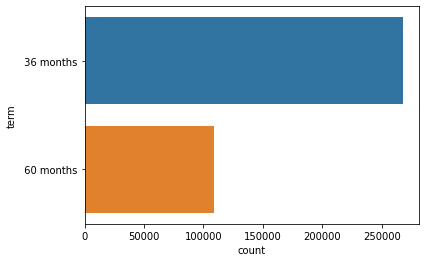

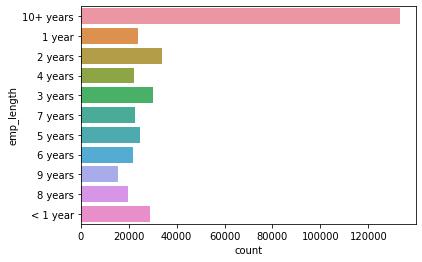

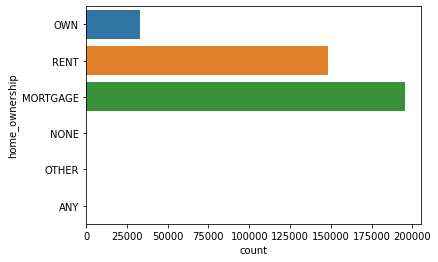

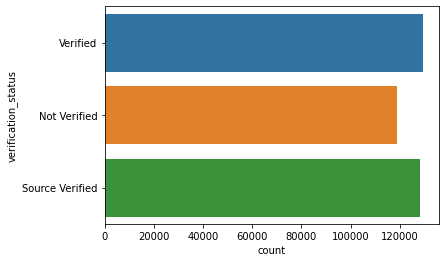

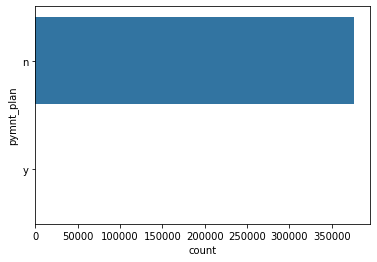

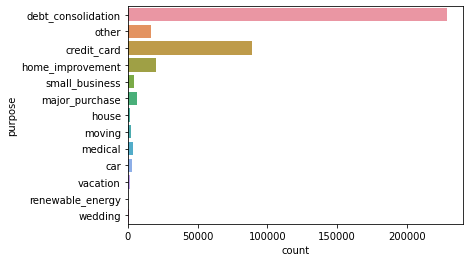

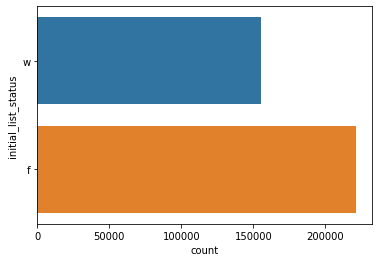

In [ ]:
# Plot Categorical Feature
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 16:
        sns.countplot(y=column, data=df)
        plt.show()

In [ ]:
# Summary Statistic Objec data type
df.describe(include='object')

,term,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status
count,376850,376850,376850,376850,376850,376850,376850,376850,376850
unique,2,35,11,6,3,2,13,50,2
top,36 months,B4,10+ years,MORTGAGE,Verified,n,debt_consolidation,CA,f
freq,268219,24792,133068,195493,129617,376845,228601,56604,221256


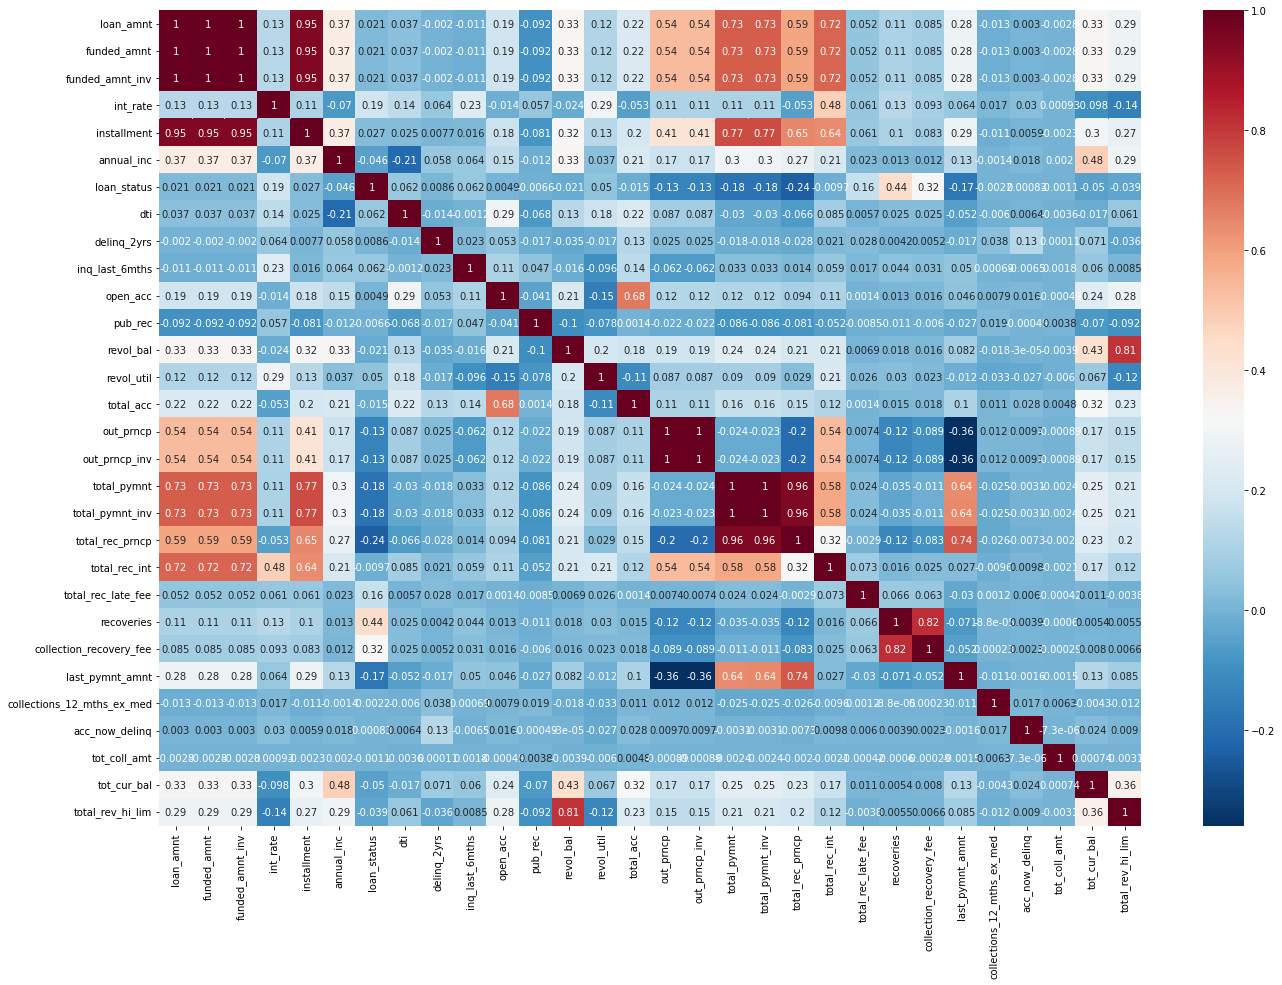

In [ ]:
# Heatmap
plt.figure(figsize=(22,15))
corrs = df.corr()
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

Result Heatmap:

=> Some columns are highly correlated.
  - loan_amnt, funded_amnt, funded_amnt_inv and Installment have high correlation. We choose loan_amnt. Because it's the value that the loan applied for by the borrower
  - revol_bal and total_rev_hi_lim has high correlation. We choose total_rev_hi_lim.
  - out_prncp and out_prncp_inv has high correlation. We choose. We choose out_prncp
  - total_pymnt, total_pymnt_inv, total_rec_prncp has high correlation. We choose total_pymnt
  - collection_recoveries_fee and recoveries has high correlation. We choose collection_recoveries_fee.




 <!-- 
 contoh hasil analisanya

 We note that Rooms, Bedrooms2, Bathrooms, and Price have strong positive relationships. 

 On the other hand, Price, our target feature, has a 

slightly weak negative correlation with YearBuilt and 

 an even weaker negative relationship with Distance from CBD 
 -->

<!-- 


# contoh di heatmap:
# Variabel density memiliki korelasi negatif kuat dengan alcohol, 
# karena itu dapat mempertimbangkan untuk membuang salah satu fitur

# Jika korelasi nya 0 dan kita ingin buat regresi linear, buang aja 
# (korelasi variabel feature thdp targetnya)
# https://datascience.stackexchange.com/questions/40602/can-we-remove-features-that-have-zero-correlation-with-the-target-label  
-->

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [ ]:
df_use = df.copy()
df_use.drop(columns=['funded_amnt', 'funded_amnt_inv', 
                     'revol_bal', 'out_prncp_inv', 'total_pymnt_inv', 
                     'total_rec_prncp', 'recoveries'
                     ], axis=1, inplace=True)

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376850 entries, 0 to 376849
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   376850 non-null  int64  
 1   term                        376850 non-null  object 
 2   int_rate                    376850 non-null  float64
 3   installment                 376850 non-null  float64
 4   sub_grade                   376850 non-null  object 
 5   emp_length                  376850 non-null  object 
 6   home_ownership              376850 non-null  object 
 7   annual_inc                  376850 non-null  float64
 8   verification_status         376850 non-null  object 
 9   loan_status                 376850 non-null  int64  
 10  pymnt_plan                  376850 non-null  object 
 11  purpose                     376850 non-null  object 
 12  addr_state                  376850 non-null  object 
 13  dti           

In [ ]:
df_use.sample(5)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
335648,12000,36 months,12.99,404.27,B5,5 years,MORTGAGE,42000.0,Not Verified,0,n,credit_card,IL,23.26,0.0,0.0,8.0,0.0,80.0,16.0,w,0.00,12256.83,256.83,0.0,0.0000,11852.56,0.0,0.0,0.0,97864.0,14200.0
95742,16000,60 months,20.49,428.28,E1,8 years,RENT,49000.0,Verified,1,n,debt_consolidation,NY,6.73,0.0,0.0,6.0,0.0,74.4,7.0,f,0.00,7566.85,3331.28,0.0,19.9966,428.28,0.0,0.0,0.0,30425.0,21800.0
320769,20000,36 months,11.99,664.20,B3,1 year,RENT,53620.0,Source Verified,0,n,debt_consolidation,CA,22.94,0.0,0.0,10.0,0.0,51.2,14.0,f,9209.42,13948.20,3157.62,0.0,0.0000,664.20,0.0,0.0,0.0,58487.0,25800.0
262391,8000,36 months,12.49,267.60,B5,10+ years,RENT,85000.0,Source Verified,0,n,debt_consolidation,CA,18.33,0.0,3.0,8.0,1.0,49.9,23.0,w,0.00,8644.96,644.96,0.0,0.0000,6771.76,0.0,0.0,509.0,48005.0,7700.0
177773,10000,36 months,11.99,332.10,B5,10+ years,RENT,61700.0,Source Verified,0,n,debt_consolidation,MI,17.12,0.0,0.0,8.0,0.0,76.2,22.0,w,6529.66,4657.02,1186.68,0.0,0.0000,332.10,0.0,0.0,0.0,14699.0,6700.0


### 5.3 Encoding Categorical Features

In [ ]:
import sklearn.preprocessing as preprocessing

# Label encoding using sklearn
labelEnc = preprocessing.LabelEncoder()
for x in df_use:
    if df_use[x].dtypes=='object':
        df_use[x] = labelEnc.fit_transform(df_use[x])


# new_target = labelEnc.fit_transform(targets)
# onehotEnc = preprocessing.OneHotEncoder()
# onehotEnc.fit(new_target.reshape(-1, 1))
# targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
# print("The original data")
# print(targets)
# print("The transform data using OneHotEncoder")
# print(targets_trans.toarray())

In [ ]:
df_use.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,27050,0,10.99,885.46,6,1,4,55000.0,2,0,0,2,22,22.87,0.0,0.0,14.0,0.0,61.2,27.0,1,10018.90,21251.04,4219.94,0.0,0.0,885.46,0.0,0.0,0.0,114834.0,59900.0
1,9750,0,13.98,333.14,10,0,5,26000.0,0,0,0,2,4,25.12,0.0,0.0,12.0,0.0,52.8,28.0,0,3710.96,7994.83,1955.79,0.0,0.0,333.14,0.0,0.0,0.0,14123.0,15100.0
2,12000,0,6.62,368.45,1,1,1,105000.0,0,0,0,2,6,14.05,0.0,1.0,12.0,0.0,21.6,22.0,1,4266.62,8842.80,1109.42,0.0,0.0,368.45,0.0,0.0,0.0,267646.0,61100.0
3,12000,0,13.53,407.40,9,1,5,40000.0,1,0,0,2,31,16.94,0.0,0.0,7.0,2.0,68.8,32.0,1,0.00,13359.77,1359.78,0.0,0.0,119.17,0.0,0.0,15386.0,13605.0,8100.0
4,15000,0,8.90,476.30,4,2,1,63000.0,0,0,0,2,9,16.51,0.0,0.0,8.0,0.0,74.2,29.0,1,5449.27,11431.20,1880.47,0.0,0.0,476.30,0.0,0.0,1514.0,272492.0,15400.0


### 5.3 Split Train Test


In [ ]:
# split to variable feature and target/labels (x and y)
x = df_use.loc[:, df_use.columns != 'loan_status'] # X value contains all the variables except labels
y = df_use['loan_status'] # these are the labels

In [ ]:
x.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,27050,0,10.99,885.46,6,1,4,55000.0,2,0,2,22,22.87,0.0,0.0,14.0,0.0,61.2,27.0,1,10018.90,21251.04,4219.94,0.0,0.0,885.46,0.0,0.0,0.0,114834.0,59900.0
1,9750,0,13.98,333.14,10,0,5,26000.0,0,0,2,4,25.12,0.0,0.0,12.0,0.0,52.8,28.0,0,3710.96,7994.83,1955.79,0.0,0.0,333.14,0.0,0.0,0.0,14123.0,15100.0
2,12000,0,6.62,368.45,1,1,1,105000.0,0,0,2,6,14.05,0.0,1.0,12.0,0.0,21.6,22.0,1,4266.62,8842.80,1109.42,0.0,0.0,368.45,0.0,0.0,0.0,267646.0,61100.0
3,12000,0,13.53,407.40,9,1,5,40000.0,1,0,2,31,16.94,0.0,0.0,7.0,2.0,68.8,32.0,1,0.00,13359.77,1359.78,0.0,0.0,119.17,0.0,0.0,15386.0,13605.0,8100.0
4,15000,0,8.90,476.30,4,2,1,63000.0,0,0,2,9,16.51,0.0,0.0,8.0,0.0,74.2,29.0,1,5449.27,11431.20,1880.47,0.0,0.0,476.30,0.0,0.0,1514.0,272492.0,15400.0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [ ]:
# Split to Train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 5.4 Feature Scaling

refrences: 
- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
- https://vitalflux.com/minmaxscaler-standardscaler-python-examples/#:~:text=The%20MinMaxscaler%20is%20a%20type,range%20from%20min%20to%20max.

In [ ]:
# Scaling using Standard Scaller
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)


# # Scalling using MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
# X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# # we have now fit and transform the data into a scaler for accurate reading and results.

=> We only scalling the feature / x variable, because we have data like amount income really big compared to other

### 5.3 Handling Imbalance Data

In [ ]:
# Oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_balanced, y_train_balanced = oversample.fit_resample(x_train_scaled, y_train)
x_test_balanced, y_test_balanced = oversample.fit_resample(x_test_scaled, y_test)

In [ ]:
y_train.value_counts()

0    234550
1     29245
Name: loan_status, dtype: int64

In [ ]:
y_train_balanced.value_counts()

1    234550
0    234550
Name: loan_status, dtype: int64

In [ ]:
y_test.value_counts()

0    100516
1     12539
Name: loan_status, dtype: int64

In [ ]:
y_test_balanced.value_counts()

0    100516
1    100516
Name: loan_status, dtype: int64

# 6.0 Modeling

References:
- https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/#:~:text=A%20common%20way%20to%20deal,like%20Random%20Forest%20or%20SMOTE.
- https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec

In [ ]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

In [ ]:
# # Define the model we want to use
# classifiers = {
#     # "LogisticRegression" : LogisticRegression(),
#     # "KNeighbors" : KNeighborsClassifier(),
#     # "SVC" : SVC(),
#     # "DecisionTree" : DecisionTreeClassifier(),
#     # "XGBoost" : XGBClassifier(),
#     #"RandomForest" : RandomForestClassifier()
# }

## Note for modeling

- We have so many rows data. If we use all the algorithm above it'll takes a really long time.
- Based on the article below, random forest could be the better decision for credit fraud

reference: 
- https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# # For training a lot of algorithm
# train_scores = []
# test_scores = []

# for key, classifier in classifiers.items():
#     classifier.fit(x_train_balanced, y_train_balanced)
#     train_score = classifier.score(x_train_balanced, y_train_balanced)
#     train_scores.append(train_score)
#     test_score = classifier.score(x_test_balanced, y_test_balanced)
#     test_scores.append(test_score)

# print('Train Score:', train_scores)
# print('Test Score:',test_scores)

Train Score: [1.0]
Test Score: [0.9585837080663775]


In [ ]:
# # Test it
# rf = RandomForestClassifier()
# model = rf.fit(x_train_balanced, y_train_balanced)
# prediction = rf.predict(x_test_balanced)

<!-- => XGBoost has better performance compare to other model, we will use it to predict the y_test_balanced and y_train_balanced -->

In [ ]:
# Training Phase
rf=RandomForestClassifier()
model_rf = rf.fit(x_train_balanced,y_train_balanced)
train_score = rf.score(x_train_balanced, y_train_balanced)
test_score = rf.score(x_test_balanced, y_test_balanced)

# Predict
pred_rf=rf.predict(x_test_balanced)
probs_rf=rf.predict_proba(x_test_balanced)[:,1]

## Evaluation Metrics

References:
- https://github.com/vappiah/Machine-Learning-Tutorials/blob/main/notebooks/ROC%20Curves-Binary%20Classification.ipynb
- https://towardsdatascience.com/top-5-metrics-for-evaluating-classification-model-83ede24c7584
- https://medium.com/datasciencestory/performance-metrics-for-evaluating-a-model-on-an-imbalanced-data-set-1feeab6c36fe
- https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

In [ ]:
# # Calculate confusion matrix
# from sklearn.metrics import confusion_matrix
# matrix=confusion_matrix(y_test_balanced, pred_rf,labels=['high','low'])
# cm=pd.DataFrame(matrix,index=['high','low'],columns=['high','low'])
# print(cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    100671
           1       1.00      0.92      0.96    100671

    accuracy                           0.96    201342
   macro avg       0.96      0.96      0.96    201342
weighted avg       0.96      0.96      0.96    201342



In [ ]:
# Create a function to plot ROC Curves
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test_balanced,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.99


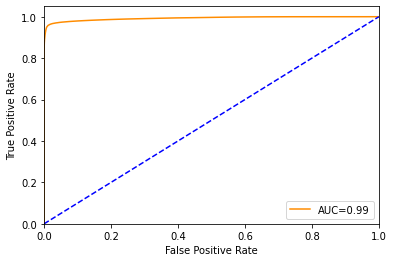

In [ ]:
#random forest
plot_roc(y_test,probs_rf)

In [ ]:
# Making the ROC curve plotting function more generic
def plot_roc2(y_test_balanced,x_test_balanced,model):  
    if hasattr(model,'decision_function'):
        probs=model.decision_function(x_test_balanced) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(x_test_balanced) [:,1]
    fpr,tpr,threshold=roc_curve(y_test_balanced,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.99


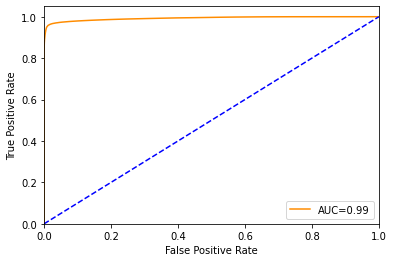

In [ ]:
#random forest
plot_roc2(y_test_balanced,x_test_balanced,model_rf)

## Note for evaluation metric result:
- **The recall** means "how many of this class you find over the whole number of element of this class"
- **The precision will** be "how many are correctly classified among that class"
- **The f1-score** is the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset (so we have 100671 of class 0 and 100671 of class 1, which is a really well balanced dataset.
- We have imbalanced dataset (before oversampling), precision and recall is highly used for imbalanced dataset. Because in an highly imbalanced dataset, a 99% accuracy can be meaningless.
- AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.
- Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between good loaner and bad loaner.

----

- **Precision**: Based on the classification report, out of all the bad loaner that the model predicted, 100% actually did.
Either they do 'Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', or 'Does not meet the credit policy. Status:Charged Off'.

- **Recall**: Based on the classification report, out of all the bad loaners that actually do something bad (late, charged off, etc), the model predicted this outcome correctly for 92%.

- **F1 Score**: Since this value is very close to 1, it tells us that the model does a good job of predicting whether or not the loaner will be a bad loaner or not.

- **AUC**: Has value  0.99, it means the model can differentiate 0 and 1 in classification.


References:
- https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn
- https://www.statology.org/sklearn-classification-report/
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=Higher%20the%20AUC%2C%20the%20better,is%20on%20the%20x%2Daxis.

## Save the model

References: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
# save the model 
from pickle import dump
from pickle import load
filename = '/content/drive/MyDrive/0.Data_analyst_important_thing/1.VIX_rakamin_DS_IDX/Tugas2_VIX_Rakamin_DS_IDX/file/finalized_model.sav'
dump(model_rf, open(filename, 'wb'))

# Refrences:

=> EDA & Data preprocessing:
- https://ai.plainenglish.io/exploratory-data-analysis-eda-and-data-preprocessing-a-beginners-guide-b1be46338006
- https://medium.com/analytics-vidhya/data-preprocessing-and-exploratory-data-analysis-for-machine-learning-75b8a6468b72#:~:text=Exploratory%20data%20analysis%20is%20often,work%20with%20statistics%20and%20data.&text=Preprocessing%3A,them%20and%20some%20statistical%20decision.
- https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4
- https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/#:~:text=The%20objective%20of%20univariate%20analysis,of%20variables%2D%20Categorical%20and%20Numerical.
- https://towardsdatascience.com/13-key-code-blocks-for-eda-classification-task-94890622be57

- Outlier: 
  - Li W, Mo W, Zhang X, Squiers JJ, Lu Y, Sellke EW, Fan W, DiMaio JM, Thatcher JE. Outlier detection and removal improves accuracy of machine learning approach to multispectral burn diagnostic imaging. J Biomed Opt. 2015 Dec;20(12):121305. doi: 10.1117/1.JBO.20.12.121305. PMID: 26305321.
  - https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
  - https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
  - https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce